In [2]:
import pandas as pd
import requests
from tabula import read_pdf
import tabula
import seaborn as sns
from matplotlib import pyplot as plt

#### Import the dataset

In [3]:
#Africa Food Production Dataset
afp_data = pd.read_excel('./Africa Food Production (2004 - 2013)1.xlsx', index_col = None, header = 0)

In [4]:
afp_data = afp_data[1:]
afp_data.columns = ["Country","Item","Year","Value"]

#### Check and Remove NaN values

In [5]:
afp_data.isnull().sum()

Country    502
Item       502
Year       502
Value      502
dtype: int64

In [6]:
afp_data = afp_data.dropna()
afp_data = afp_data.reset_index(drop=True)

In [7]:
countries = [i for i in afp_data["Country"].unique()]
countries

['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Cabo Verde',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Congo',
 "Cote d'Ivoire",
 'Djibouti',
 'Egypt',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Swaziland',
 'Togo',
 'Tunisia',
 'Uganda',
 'United Republic',
 'Zambia',
 'Zimbabwe']

In [8]:
       
items = [i for i in afp_data["Item"].unique()]
items

['Wheat and products',
 'Rice (Milled Equivalent)',
 'Barley and products',
 'Maize and products',
 'Oats',
 'Sorghum and products',
 'Cereals, Other',
 'Potatoes and products',
 'Sugar beet',
 'Sugar (Raw Equivalent)',
 'Honey',
 'Beans',
 'Peas',
 'Pulses, Other and products',
 'Nuts and products',
 'Groundnuts (Shelled Eq)',
 'Sunflower seed',
 'Rape and Mustardseed',
 'Cottonseed',
 'Olives (including preserved)',
 'Groundnut Oil',
 'Sunflowerseed Oil',
 'Rape and Mustard Oil',
 'Olive Oil',
 'Oilcrops Oil, Other',
 'Tomatoes and products',
 'Onions',
 'Vegetables, Other',
 'Oranges, Mandarines',
 'Lemons, Limes and products',
 'Grapefruit and products',
 'Citrus, Other',
 'Bananas',
 'Apples and products',
 'Dates',
 'Grapes and products (excl wine',
 'Fruits, Other',
 'Pimento',
 'Wine',
 'Beer',
 'Beverages, Alcoholic',
 'Bovine Meat',
 'Mutton & Goat Meat',
 'Pigmeat',
 'Poultry Meat',
 'Meat, Other',
 'Offals, Edible',
 'Butter, Ghee',
 'Fats, Animals, Raw',
 'Eggs',
 'Milk - 

In [9]:
format_dict = {'Value': '{0:,.0f} kt'}
afp_data['Year'] = pd.to_datetime(afp_data['Year'], format='%Y')
afp_data['Year'] = pd.DatetimeIndex(afp_data['Year']).year
afp_data["Value"] = pd.to_numeric(afp_data["Value"])

In [10]:
totals = pd.DataFrame(afp_data.groupby(["Country","Year", "Item"])["Value"].sum())
totals.style.format(format_dict)

In [11]:
total_prod = pd.DataFrame(afp_data.groupby(["Country","Year"])["Value"].sum())
total_prod.style.format(format_dict)

<AxesSubplot:xlabel='Year', ylabel='Value'>

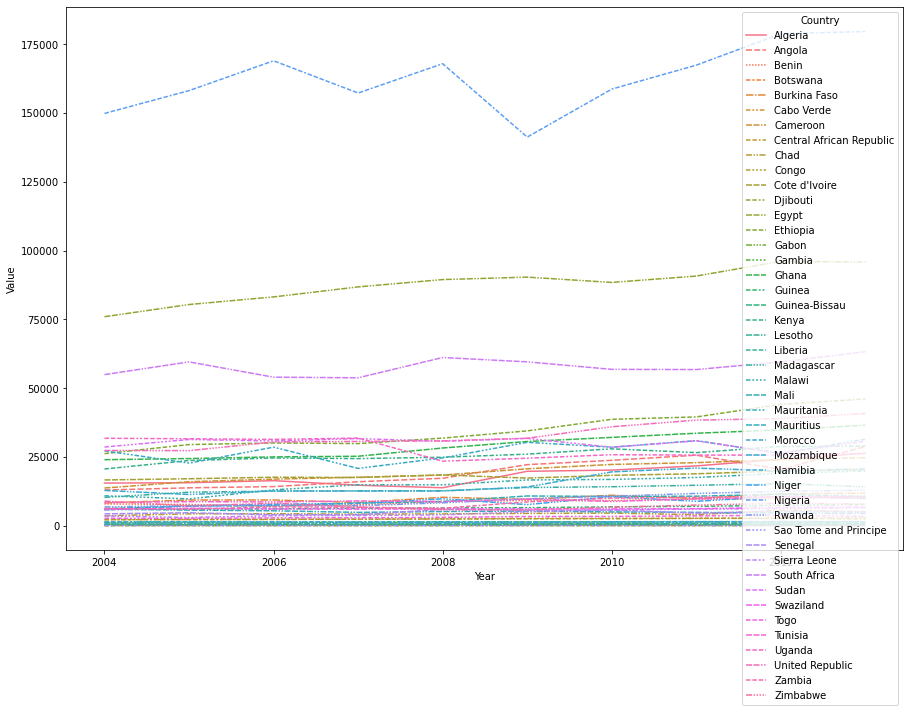

In [12]:
plt.figure(figsize=(15,10))
sns.lineplot(data=total_prod, x='Year', y='Value', hue='Country', style= 'Country')

In [13]:
items = pd.DataFrame(afp_data.groupby(["Year", "Item"])["Value"].sum())
items.style.format(format_dict)

<AxesSubplot:xlabel='Year', ylabel='Value'>

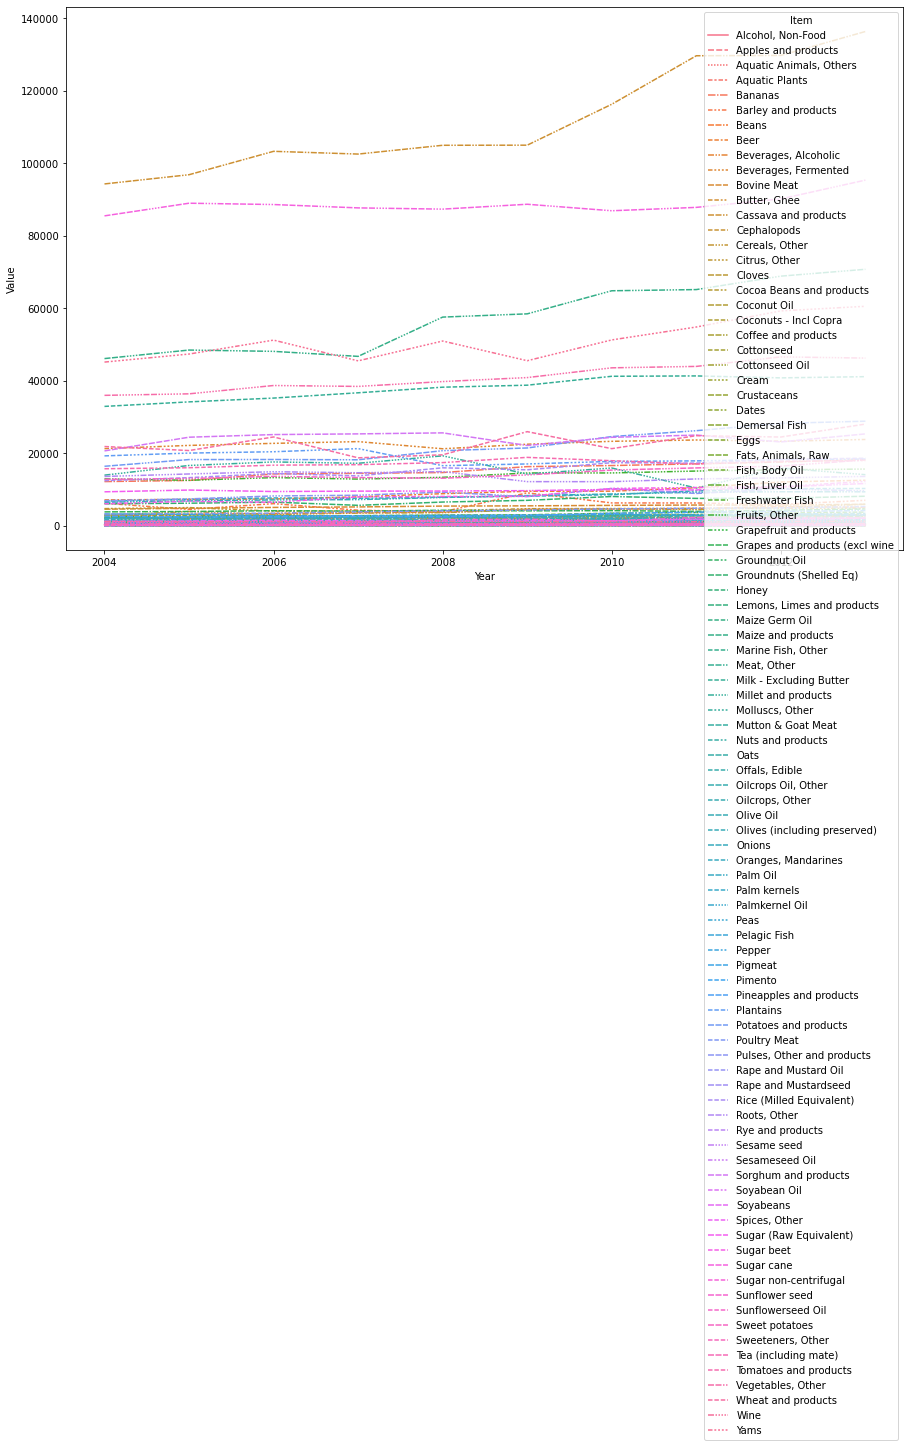

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(data=items, x='Year', y='Value', hue='Item', style= 'Item')

In [18]:
afp_data.groupby("Item")[["Value"]].sum().sort_values('Value', ascending = False).style.format({'Value': '{0:,.0f} kt'})

In [26]:
yr_total = afp_data.groupby("Year")[["Value"]].sum().sort_values('Value', ascending = False)
yr_total.style.format({'Value': '{0:,.0f} kt'})
yr_total.to_csv('./yr_total.csv')

In [24]:
country_grp = afp_data.groupby("Country")[["Value"]].sum().sort_values('Value', ascending = False)
country_grp.style.format({'Value': '{0:,.0f} kt'})

In [25]:
country_grp.to_csv('./country_grp_prod.csv')

In [37]:
afp_data['class']=afp_data['Item'].replace({'Wheat and products': 'plant',
 'Rice (Milled Equivalent)': 'plant',
 'Barley and products': 'plant',
 'Maize and products': 'plant',
 'Oats': 'plant',
 'Sorghum and products': 'plant',
 'Cereals, Other': 'plant',
 'Potatoes and products': 'plant',
 'Sugar beet': 'plant',
 'Sugar (Raw Equivalent)': 'plant',
 'Honey': 'animal',
 'Beans': 'plant',
 'Peas': 'plant',
 'Pulses, Other and products': 'plant',
 'Nuts and products': 'plant',
 'Groundnuts (Shelled Eq)': 'plant',
 'Sunflower seed': 'plant',
 'Rape and Mustardseed': 'plant',
 'Cottonseed': 'plant',
 'Olives (including preserved)': 'plant',
 'Groundnut Oil': 'plant',
 'Sunflowerseed Oil': 'plant',
 'Rape and Mustard Oil': 'plant',
 'Olive Oil': 'plant',
 'Oilcrops Oil, Other': 'plant',
 'Tomatoes and products': 'plant',
 'Onions': 'plant',
 'Vegetables, Other': 'plant',
 'Oranges, Mandarines': 'plant',
 'Lemons, Limes and products': 'plant',
 'Grapefruit and products': 'plant',
 'Citrus, Other': 'plant',
 'Bananas': 'plant',
 'Apples and products': 'plant',
 'Dates': 'plant',
 'Grapes and products (excl wine': 'plant',
 'Fruits, Other': 'plant',
 'Pimento': 'plant',
 'Wine': 'plant',
 'Beer': 'plant',
 'Beverages, Alcoholic': 'plant',
 'Bovine Meat':'animal',
 'Mutton & Goat Meat':'animal',
 'Pigmeat':'animal',
 'Poultry Meat':'animal',
 'Meat, Other':'animal',
 'Offals, Edible':'animal',
 'Butter, Ghee':'animal',
 'Fats, Animals, Raw':'animal',
 'Eggs':'animal',
 'Milk - Excluding Butter':'animal',
 'Freshwater Fish':'animal',
 'Demersal Fish':'animal',
 'Pelagic Fish':'animal',
 'Marine Fish, Other':'animal',
 'Crustaceans':'animal',
 'Cephalopods':'animal',
 'Molluscs, Other':'animal',
 'Millet and products':'plant',
 'Cassava and products':'plant',
 'Sweet potatoes':'plant',
 'Sugar cane':'plant',
 'Soyabeans':'plant',
 'Sesame seed':'plant',
 'Palm kernels':'plant',
 'Oilcrops, Other':'plant',
 'Cottonseed Oil':'plant',
 'Palmkernel Oil':'plant',
 'Palm Oil':'plant',
 'Pineapples and products':'plant',
 'Coffee and products':'plant',
 'Cocoa Beans and products':'plant',
 'Beverages, Fermented':'plant',
 'Fish, Body Oil':'animal',
 'Yams':'plant',
 'Roots, Other':'plant',
 'Coconuts - Incl Copra':'plant',
 'Soyabean Oil':'plant',
 'Coconut Oil':'plant',
 'Pepper':'plant',
 'Aquatic Animals, Others':'animal',
 'Sweeteners, Other':'plant',
 'Cream':'plant',
 'Fish, Liver Oil':'animal',
 'Sesameseed Oil':'plant',
 'Spices, Other':'plant',
 'Aquatic Plants':'plant',
 'Plantains':'plant',
 'Tea (including mate)':'plant',
 'Rye and products':'plant',
 'Alcohol, Non-Food':'plant',
 'Sugar non-centrifugal':'plant',
 'Maize Germ Oil':'plant',
 'Cloves':'plant'})

In [57]:
item_class = afp_data.groupby("class")[["Value"]].sum().sort_values('Value', ascending = False)
item_class.style.background_gradient().format({'Value': '{0:,.0f} kt'})

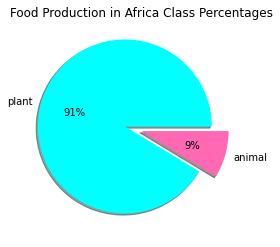

In [55]:
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data=item_class, x = 'Value',labels = ['plant', 'animal'], autopct='%.0f%%', explode = [0.2,0],shadow = True, colors = ["cyan", "hotpink"])
plt.title("Food Production in Africa Class Percentages")
plt.show()

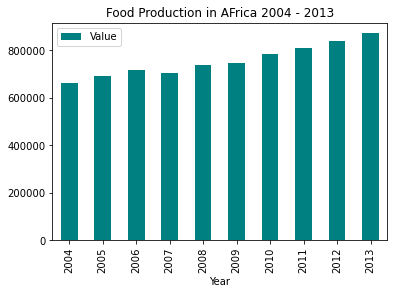

In [71]:
afp_data.groupby("Year")[["Value"]].sum().plot.bar(color = 'teal')
plt.title("Food Production in AFrica 2004 - 2013")
plt.show()

In [91]:
year_sort = afp_data.query('Item=="Rice (Milled Equivalent)"')

In [92]:
year_sort

Country                      Item  Year  Value  class
10      Algeria  Rice (Milled Equivalent)  2004      0  plant
11      Algeria  Rice (Milled Equivalent)  2005      0  plant
12      Algeria  Rice (Milled Equivalent)  2006      0  plant
13      Algeria  Rice (Milled Equivalent)  2007      0  plant
14      Algeria  Rice (Milled Equivalent)  2008      0  plant
...         ...                       ...   ...    ...    ...
22485  Zimbabwe  Rice (Milled Equivalent)  2009      0  plant
22486  Zimbabwe  Rice (Milled Equivalent)  2010      0  plant
22487  Zimbabwe  Rice (Milled Equivalent)  2011      0  plant
22488  Zimbabwe  Rice (Milled Equivalent)  2012      0  plant
22489  Zimbabwe  Rice (Milled Equivalent)  2013      0  plant

[380 rows x 5 columns]